In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

import matplotlib

matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = (20, 20)

(720, 1280, 3)
(720, 1280, 3)


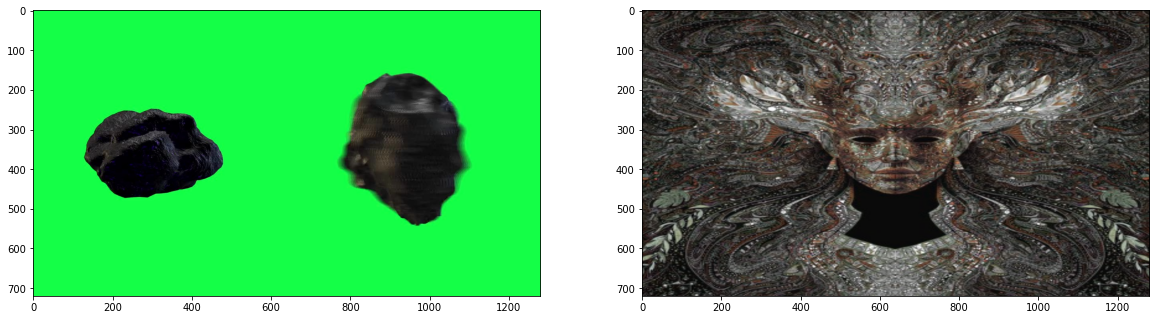

In [11]:
im = cv.imread('green-asteriod.jpg', cv.IMREAD_COLOR)
imBg = cv.imread('bg.jpg', cv.IMREAD_COLOR)
imCopy = im.copy()
imBgCopy = cv.resize(imBg, dsize=(im.shape[1], im.shape[0]), interpolation=cv.INTER_LINEAR)
print(im.shape)
print(imBgCopy.shape)
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(imBgCopy)


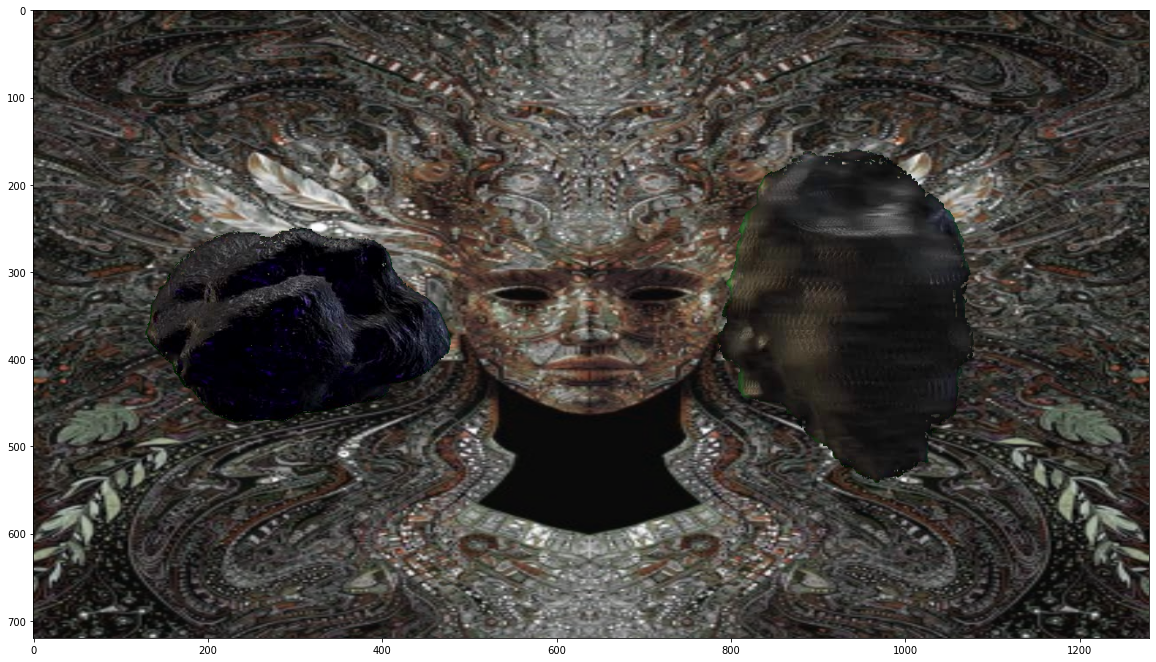

In [24]:
# Create Mask
frameHSV = cv.cvtColor(im, cv.COLOR_BGR2HSV)
B, G, R = cv.split(im)
defringe=0
gMod = np.uint8(np.clip(np.int32(G) + np.ones_like(G, dtype="int32") * defringe, 0, 255))
frameMod = cv.merge((B, gMod, R))

# Step : find color range HSV Channel
frameModHSV = cv.cvtColor(frameMod, cv.COLOR_BGR2HSV)

H, S, V = cv.split(frameHSV)
hMod, sMod, vMod = cv.split(frameModHSV)

# Step : Adjust tolerance level in HSV
hsvColorValue = 54
tolerance = 5
lowerH = np.array(np.clip(hsvColorValue - tolerance, 0, 180))
upperH = np.array(np.clip(hsvColorValue + tolerance, 0, 180))

# Step : Create Mask
mask = cv.inRange(hMod, lowerH, upperH)
mask = 255 - mask

# Step : Adjust Softness level, Gaussian Blur
softness = 10
maskBlur = cv.GaussianBlur(mask, (2 * softness + 1, 2 * softness + 1), 0, 0)
maskBlur = np.uint8(np.round((maskBlur / 255.0) * (mask * 255.0) * 255))

# Step : Apply Mask on Value Channel
v = np.uint8(np.round((V / 255.0) * (maskBlur / 255.0) * 255))
softFrame = cv.merge((H, S, v))
softFrame = cv.cvtColor(softFrame, cv.COLOR_HSV2BGR)

# Step : Crate Mask
maskInv = np.ones_like(imBgCopy)
maskInv[:, :, 0] = 255 - mask
maskInv[:, :, 1] = 255 - mask
maskInv[:, :, 2] = 255 - mask

# Step : Apply Mask on Background
bgFrame = np.uint8(np.round((imBgCopy / 255.0) * (maskInv / 255.0) * 255))

# Step : Combine Frame and Background
bgFrame = cv.add(softFrame, bgFrame)

plt.imshow(bgFrame);
plt.show()

In [ ]:
#Capturing Green pixels 100 to 255 in BGR format
greenMask = cv.inRange(imCopy, (0, 100, 0), (100, 255, 100))
greenMask = cv.GaussianBlur(greenMask, (5, 5), 0)
# plt.imshow(greenMask)
imCopy[greenMask != 0] = [0, 0, 0]
plt.imshow(imCopy)

In [ ]:
imBgCopy[greenMask == 0] = [0, 0, 0]
plt.imshow(imBgCopy)

In [ ]:
merge = imBgCopy + imCopy
plt.imshow(merge)